In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%precision %.4f

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Задание 1.1

In [ ]:
path = "/content/drive/MyDrive/data/shopping_trends_updated.csv"
df = pd.read_csv(path)

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df = df.rename(columns={'Purchase_Amount_(USD)': 'Purchase_Amount'})

In [ ]:
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount,Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.describe()

,Customer_ID,Age,Purchase_Amount,Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
Item_Purchased,0
Category,0
Purchase_Amount,0
Location,0
Size,0
Color,0
Season,0


## Гипотезы

1. **Женщины старше 40 лет покупают в основном осенью.**

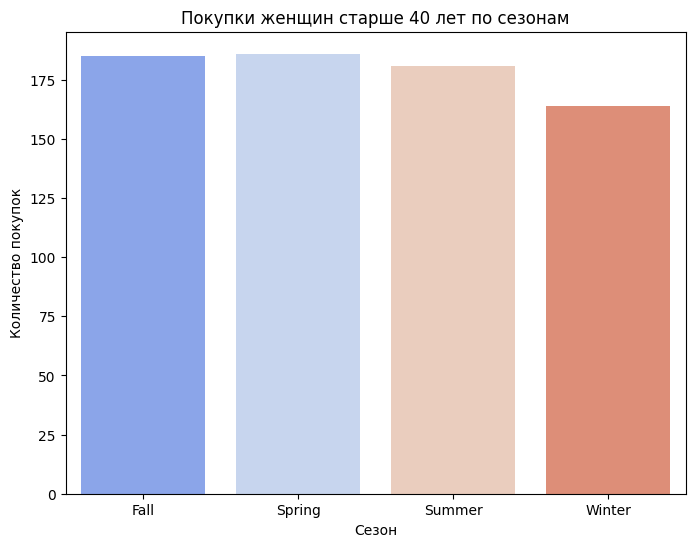

In [ ]:
# Фильтрация женщин старше 40 лет
df_women_40 = df[(df['Gender'] == 'Female') & (df['Age'] > 40)]

# Группируем по сезону и считаем количество покупок
autumn_sales = df_women_40.groupby('Season').size().reset_index(name='Sales')

# Строим график с использованием seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Season', y='Sales', data=autumn_sales, palette='coolwarm')

# Настроим заголовок и метки
plt.title('Покупки женщин старше 40 лет по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Количество покупок')

# Показать график
plt.show()


Большее количество покупок женщин старше 40 лет приходится на осень и весну, как раз перед теплым и холодным сезонами.

2. **Верхнюю одежду чаще покупают в осенний сезон.**

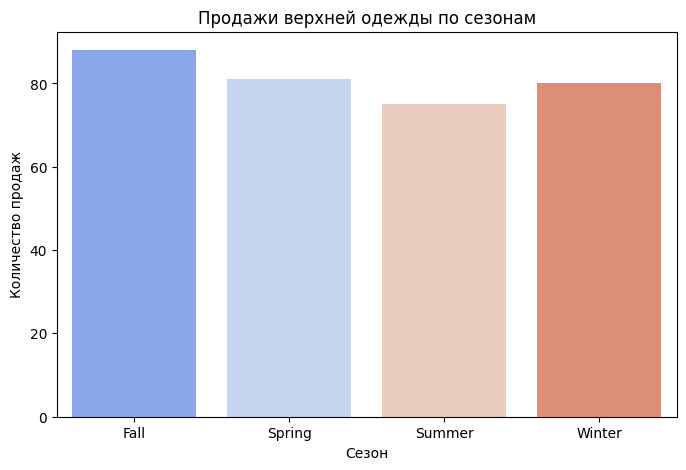

In [ ]:
# Фильтруем покупки верхней одежды
outerwear_sales = df[df['Category'] == 'Outerwear']

# Подсчитываем количество продаж по сезонам
season_sales = outerwear_sales.groupby('Season').size().reset_index(name='Sales')

# Строим график с помощью seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Season', y='Sales', data=season_sales, palette='coolwarm')

# Настроим заголовок и метки
plt.title('Продажи верхней одежды по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Количество продаж')

# Показать график
plt.show()


Большинство людей покупают верхнюю одежду осенью, перед зимним сезоном.

3. **Клиенты из более крупных городов совершают покупки чаще.**

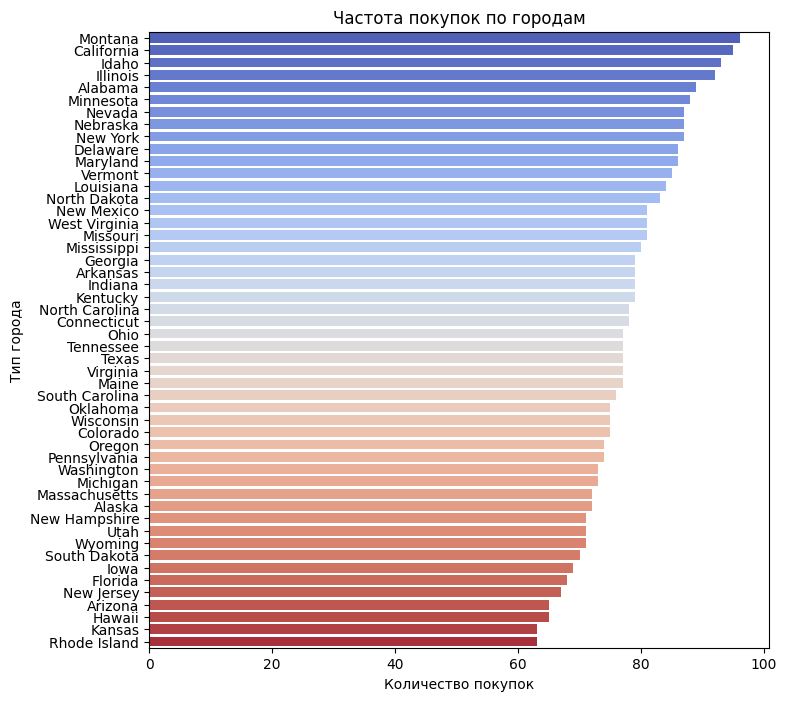

In [ ]:
# Группируем по типу города и считаем количество покупок
city_sales = df.groupby('Location').size().reset_index(name='Sales').sort_values(by='Sales', ascending=False)

# Строим график с использованием seaborn
plt.figure(figsize=(8, 8))
sns.barplot(x='Sales', y='Location', data=city_sales, palette='coolwarm')

# Настроим заголовок и метки
plt.title('Частота покупок по городам')
plt.xlabel('Количество покупок')
plt.ylabel('Тип города')

# Показать график
plt.show()

Большинство покупателей из больших городов, Монтаны и Калифорнии, поскольку в крупных городах есть больше точек продаж и доступ к онлайн-магазинам.

4. **Клиенты, имеющие подписку, совершают покупки на более высокие суммы**, так как подписка может давать скидки или дополнительные преимущества.

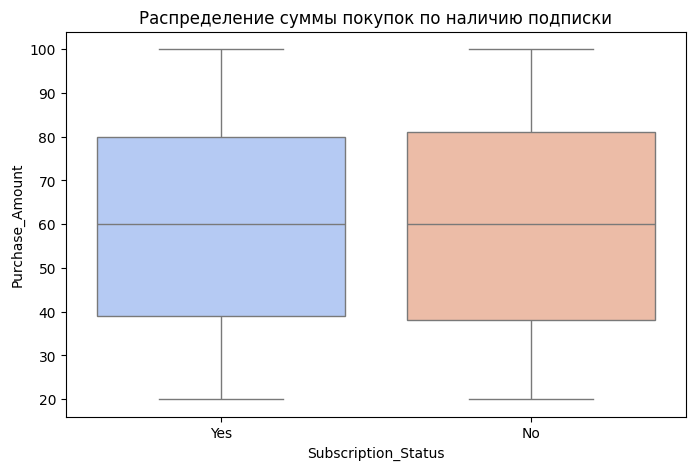

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Subscription_Status', y='Purchase_Amount', data=df, palette='coolwarm')
plt.title('Распределение суммы покупок по наличию подписки')
plt.show()


Наличие подписки не влияет на сумму покупок. Люди покупают дорогие товары и с подпиской и без нее.

5. **Молодые покупатели (до 25 лет) делают менее крупные покупки по стоимости**, так как могут иметь менее стабильный доход или покупать товары в меньших объемах.

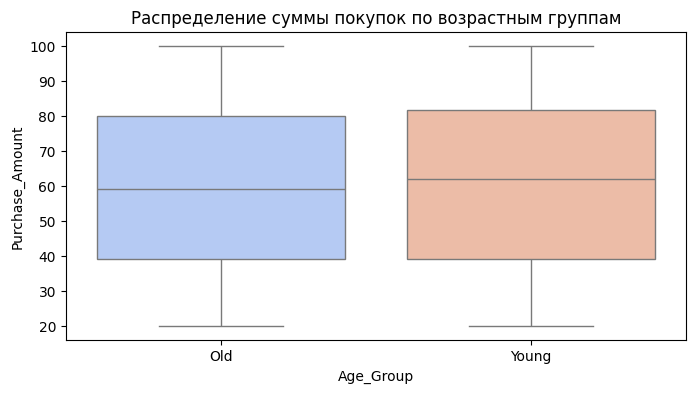

In [ ]:
df['Age_Group'] = df['Age'].apply(lambda x: 'Old' if x > 25 else 'Young')

plt.figure(figsize=(8, 4))
sns.boxplot(x='Age_Group', y='Purchase_Amount', data=df, palette='coolwarm')
plt.title('Распределение суммы покупок по возрастным группам')
plt.show()


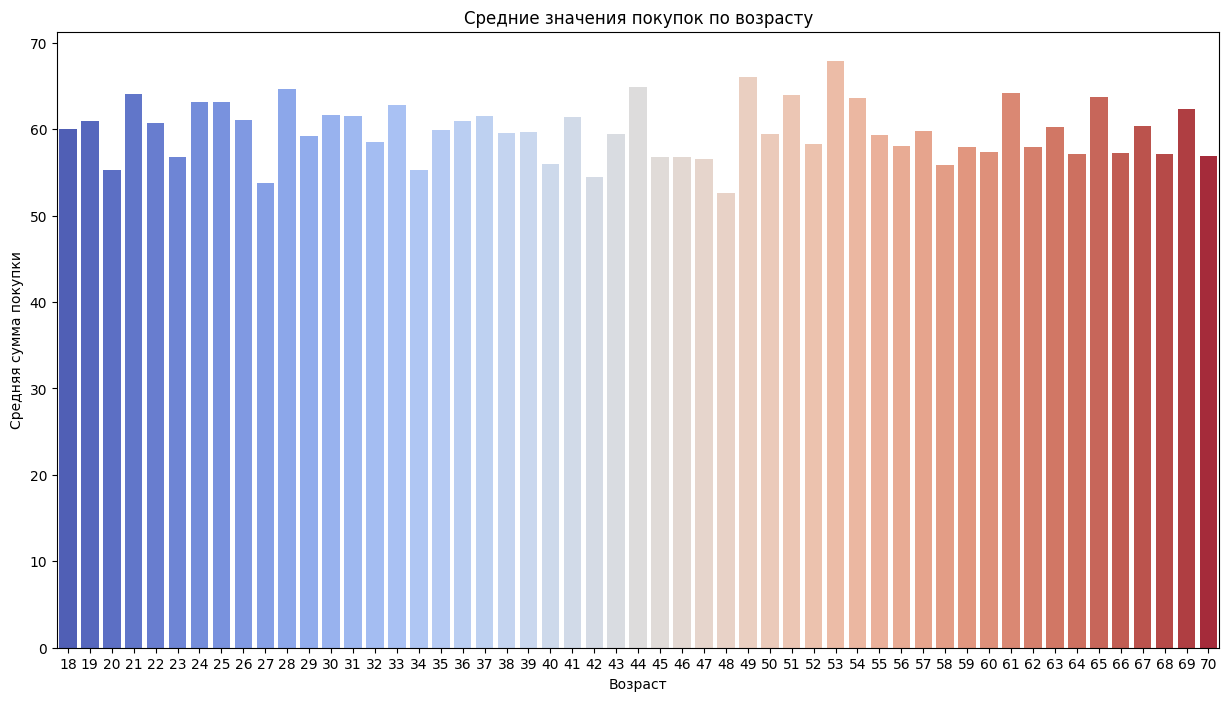

In [ ]:
# Группировка по возрасту и расчет средних значений покупок
age_avg_purchase = df.groupby('Age')['Purchase_Amount'].mean().reset_index()

# Строим график с использованием seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='Age', y='Purchase_Amount', data=age_avg_purchase, palette='coolwarm')

# Добавляем подписи и заголовок
plt.title('Средние значения покупок по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Средняя сумма покупки')

# Показать график
plt.show()


Средняя стоимость покупок не зависит от возраста. Молодые покупатели до 25 лет совершают такие же покупки по стоимости, как и более зрелые.

In [ ]:
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount,Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Задание 1.2

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды.

**Самый популярный товар**

In [ ]:
# Подсчитываем количество покупок для каждого товара (частота появления)
product_counts = df['Item_Purchased'].value_counts().reset_index()

product_counts.columns = ['Item_Purchased', 'purchase_count']

# Сортируем по количеству покупок (по убыванию)
product_counts_sorted = product_counts.sort_values(by='purchase_count', ascending=False)

# Самый популярный товар
most_popular_product = product_counts_sorted.iloc[0]
print(most_popular_product)


Item_Purchased    Blouse
purchase_count       171
Name: 0, dtype: object


Самым популярным товаром является блузка, ее купили 171 раз.

**Распределение покупателей по полу**

In [ ]:
# Подсчитываем распределение покупателей по полу
df['Gender'].value_counts()


,count
Gender,
Male,2652
Female,1248


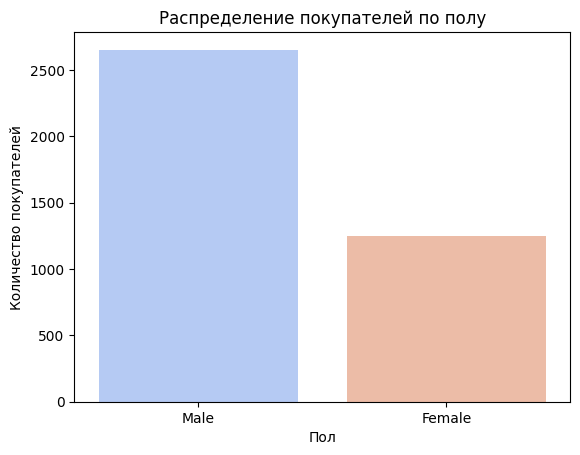

In [ ]:
# Столбчатая диаграмма для распределения по полу
sns.countplot(x='Gender', data=df, palette='coolwarm')

# Добавляем подписи и заголовок
plt.title('Распределение покупателей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество покупателей')

# Показываем график
plt.show()


Мужчины совершали покупки в два раза чаще, чем женщины.

**Какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары**

In [ ]:
# Группировка по полу
gender_group = df.groupby('Gender').agg(
    total_purchases=('Purchase_Amount', 'sum'),
    purchase_count=('Purchase_Amount', 'count'),
    avg_purchase_value=('Purchase_Amount', 'mean')
).reset_index()

# Сортируем по общим покупкам, количеству покупок и средней стоимости
gender_group_sorted = gender_group.sort_values(by=['total_purchases', 'purchase_count', 'avg_purchase_value'], ascending=False)

# Результат
print(gender_group_sorted)


   Gender  total_purchases  purchase_count  avg_purchase_value
1    Male           157890            2652           59.536199
0  Female            75191            1248           60.249199


Чаще покупки совершают мужчины, однако, средняя стоимость покупок немного выше у женщин.

In [ ]:
# Группировка по возрасту
age_group = df.groupby('Age').agg(
    total_purchases=('Purchase_Amount', 'sum'),
    purchase_count=('Purchase_Amount', 'count'),
    avg_purchase_value=('Purchase_Amount', 'mean')
).reset_index()

# Сортируем по общим покупкам, количеству покупок и средней стоимости
age_group_sorted = age_group.sort_values(by=['total_purchases', 'purchase_count', 'avg_purchase_value'], ascending=False)

# Результат
print(age_group_sorted)


    Age  total_purchases  purchase_count  avg_purchase_value
31   49             5552              84           66.095238
51   69             5484              88           62.318182
7    25             5372              85           63.200000
23   41             5282              86           61.418605
36   54             5282              83           63.638554
39   57             5200              87           59.770115
10   28             5104              79           64.607595
1    19             4941              81           61.000000
32   50             4930              83           59.397590
13   31             4864              79           61.569620
44   62             4809              83           57.939759
14   32             4796              82           58.487805
35   53             4752              70           67.885714
19   37             4737              77           61.519481
25   43             4698              79           59.468354
33   51             4601

Больше всего покупок совершили люди в возрасте 69 лет. Самые дорогие покупки у людей 53 лет.

**Есть ли зависимость между цветом одежды и сезоном.**

In [ ]:
# Подсчитываем распределение цветов по сезонам
color_season_distribution = pd.crosstab(df['Color'], df['Season'], margins=True, margins_name="Total")

In [ ]:
from scipy.stats import chi2_contingency

# Создаем таблицу сопряженности
contingency_table = pd.crosstab(df['Color'], df['Season'])

# Применяем тест хи-квадрат
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Выводим результат
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")


Chi-squared statistic: 64.6506366841786
P-value: 0.718551112120402


На основании полученного p-значения (0.718), которое значительно больше уровня значимости 0.05, можно сделать вывод, что нет статистически значимой зависимости между цветом одежды и сезоном.

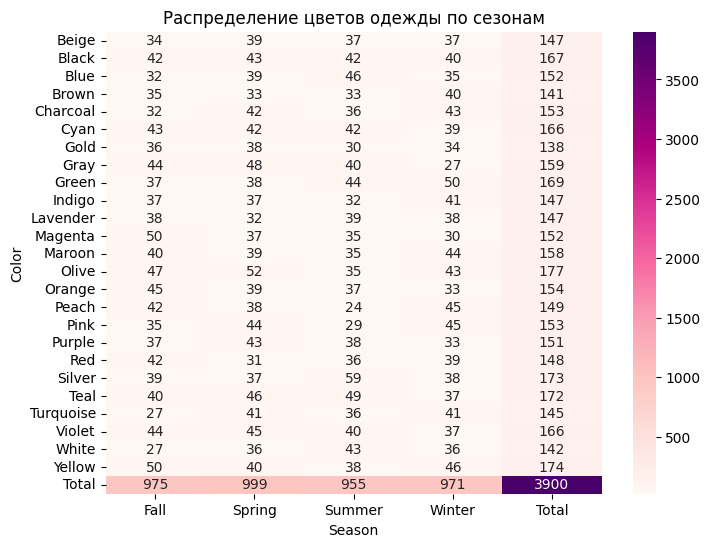

In [ ]:
# Строим тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(color_season_distribution, annot=True, cmap='RdPu', fmt='d')

# Добавляем заголовок
plt.title('Распределение цветов одежды по сезонам')

plt.show()


**Посчитать сезонный mau (уникальных пользователей за сезон) и его динамику.**

In [ ]:
# Подсчитываем уникальных пользователей по сезонам
seasonal_mau = df.groupby('Season')['Customer_ID'].nunique().reset_index()

# Переименуем столбцы для удобства
seasonal_mau.columns = ['Season', 'unique_users']

# Выводим результат
print(seasonal_mau)


   Season  unique_users
0    Fall           975
1  Spring           999
2  Summer           955
3  Winter           971


In [ ]:
# Вычисляем динамику MAU (процентное изменение)
seasonal_mau['mau_change'] = seasonal_mau['unique_users'].pct_change() * 100

# Выводим результат с динамикой
print(seasonal_mau)


   Season  unique_users  mau_change
0    Fall           975         NaN
1  Spring           999    2.461538
2  Summer           955   -4.404404
3  Winter           971    1.675393


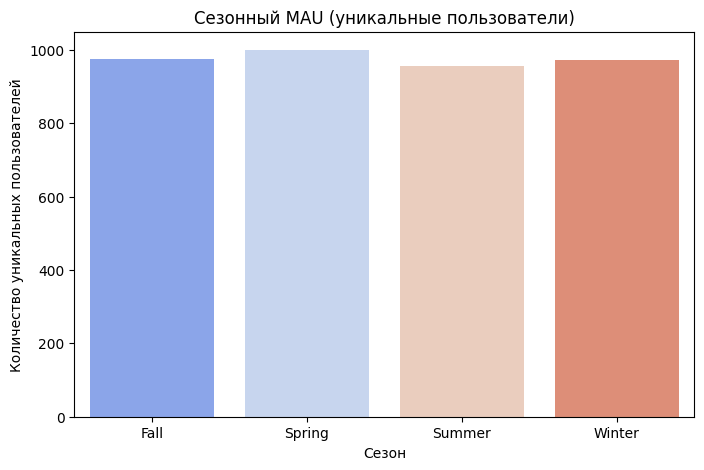

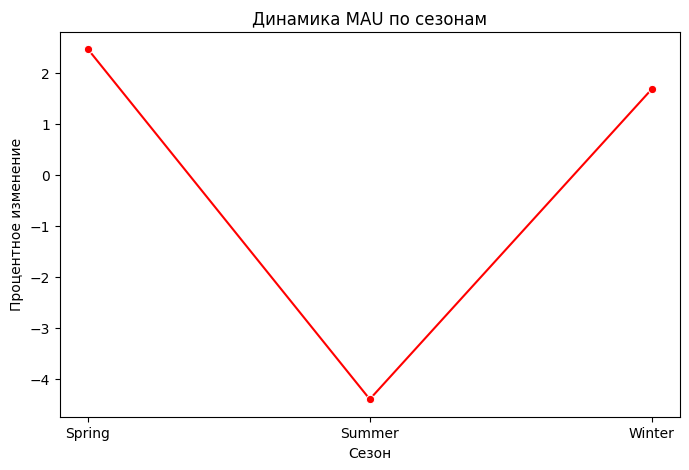

In [ ]:
# Строим график для уникальных пользователей по сезону
plt.figure(figsize=(8, 5))
sns.barplot(x='Season', y='unique_users', data=seasonal_mau, palette='coolwarm')

# Добавляем подписи
plt.title('Сезонный MAU (уникальные пользователи)')
plt.xlabel('Сезон')
plt.ylabel('Количество уникальных пользователей')

plt.show()

# Строим график динамики MAU
plt.figure(figsize=(8, 5))
sns.lineplot(x='Season', y='mau_change', data=seasonal_mau, marker='o', color='red')

# Добавляем подписи
plt.title('Динамика MAU по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Процентное изменение')

plt.show()


Весной наблюдается рост пользователей, а летом спад.
Зимой наблюдается небольшое увеличение количества пользователей.

**Найдите самую популярную букву в названии одежды.**

In [ ]:
# Разбиваем все названия на отдельные буквы
letters = ''.join(df['Item_Purchased']).replace(' ', '').lower()

# Создаём серию и считаем частоту каждой буквы
letter_series = pd.Series(list(letters))

# Находим наиболее частую букву
most_common_letter = letter_series.value_counts().idxmax()
most_common_count = letter_series.value_counts().max()

# Выводим результат
print(f"Самая популярная буква: '{most_common_letter}' встречается {most_common_count} раз(а).")


Самая популярная буква: 's' встречается 4063 раз(а).


# Задание 2

In [ ]:
path = "/content/drive/MyDrive/data/drinks.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


Шаг 3: Исследование потребления вина, пива и крепких напитков

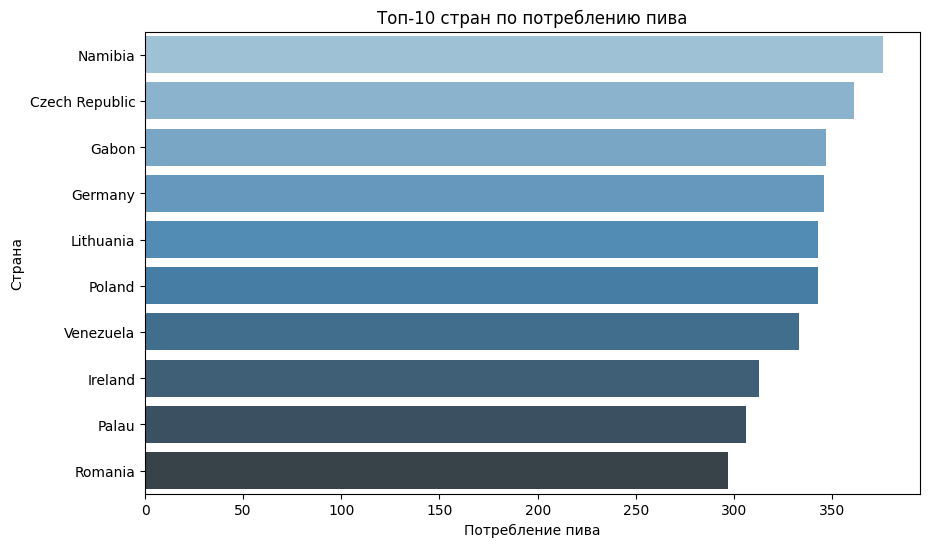

In [ ]:
# Сортируем по потреблению пива
beer_consumption = df[['country', 'beer_servings']].sort_values(by='beer_servings', ascending=False)

# Визуализируем топ-10 стран по потреблению пива
plt.figure(figsize=(10, 6))
sns.barplot(x='beer_servings', y='country', data=beer_consumption.head(10), palette='Blues_d')
plt.title('Топ-10 стран по потреблению пива')
plt.xlabel('Потребление пива')
plt.ylabel('Страна')
plt.show()


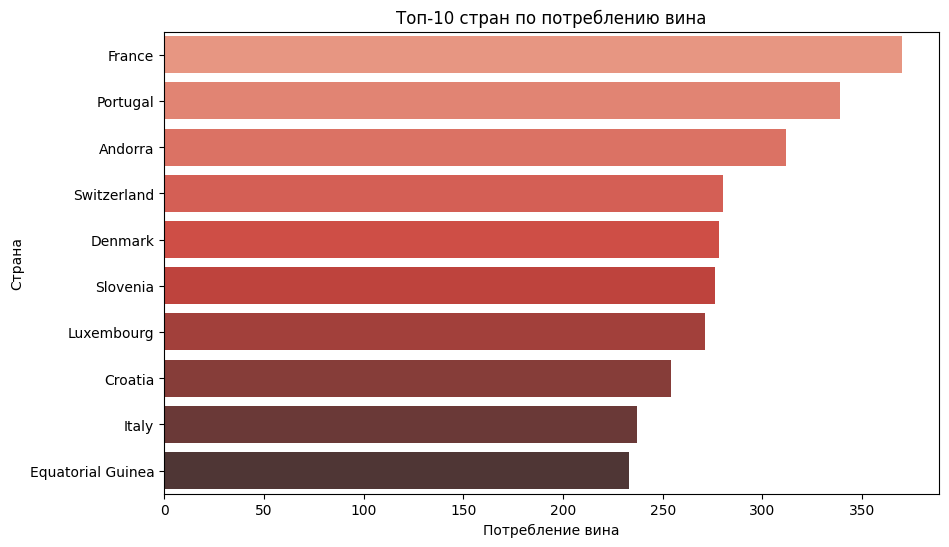

In [ ]:
# Сортируем по потреблению вина
wine_consumption = df[['country', 'wine_servings']].sort_values(by='wine_servings', ascending=False)

# Визуализируем топ-10 стран по потреблению вина
plt.figure(figsize=(10, 6))
sns.barplot(x='wine_servings', y='country', data=wine_consumption.head(10), palette='Reds_d')
plt.title('Топ-10 стран по потреблению вина')
plt.xlabel('Потребление вина')
plt.ylabel('Страна')
plt.show()


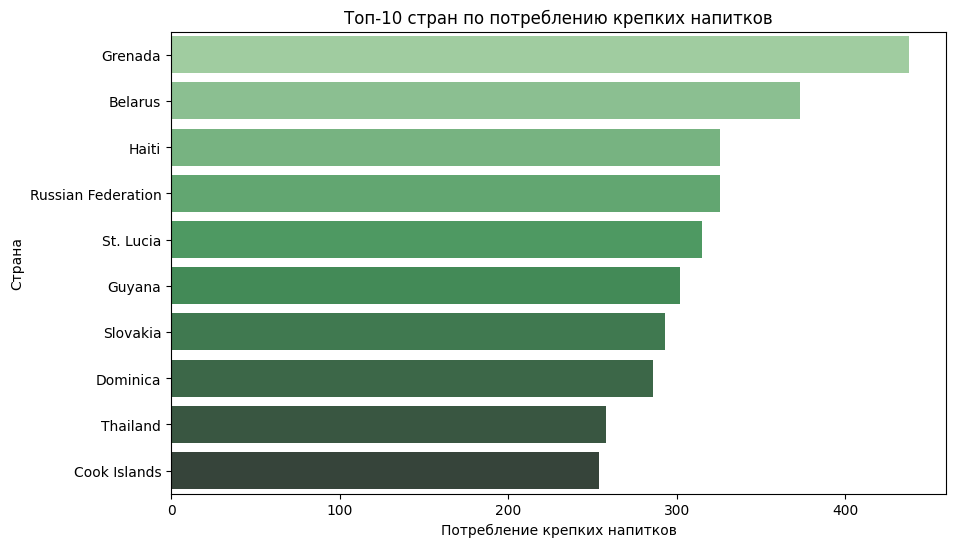

In [ ]:
# Сортируем по потреблению крепких напитков
spirit_consumption = df[['country', 'spirit_servings']].sort_values(by='spirit_servings', ascending=False)

# Визуализируем топ-10 стран по потреблению крепких напитков
plt.figure(figsize=(10, 6))
sns.barplot(x='spirit_servings', y='country', data=spirit_consumption.head(10), palette='Greens_d')
plt.title('Топ-10 стран по потреблению крепких напитков')
plt.xlabel('Потребление крепких напитков')
plt.ylabel('Страна')
plt.show()


Намибия, Чешская Республика лидируют по потреблению пива.

Франция, Португалия известны высоким потреблением вина.

Гренада, Белоруссия возглавляют список по потреблению крепких напитков.

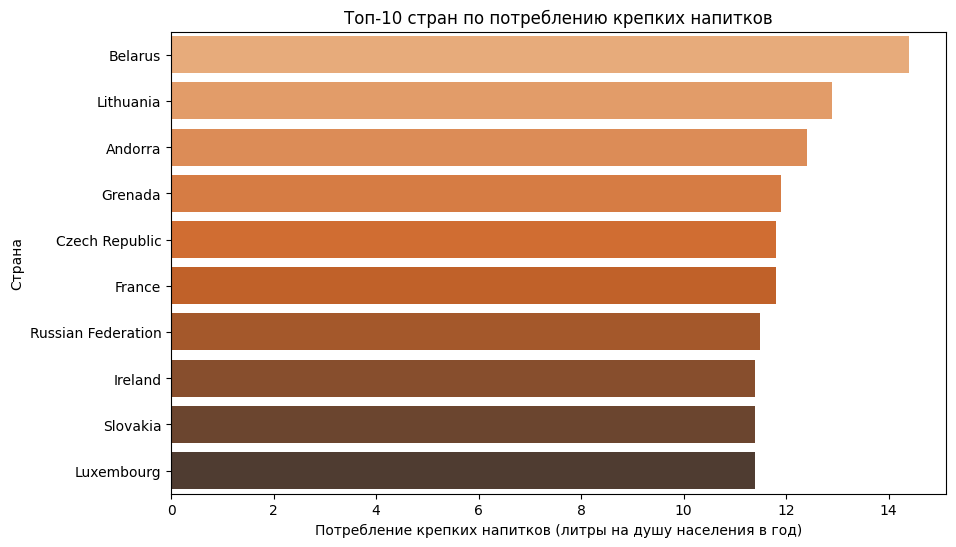

In [ ]:
# Сортируем по потреблению алкаголя
spirit_consumption = df[['country', 'total_litres_of_pure_alcohol']].sort_values(by='total_litres_of_pure_alcohol', ascending=False)

# Визуализируем топ-10 стран по потреблению алкаголя
plt.figure(figsize=(10, 6))
sns.barplot(x='total_litres_of_pure_alcohol', y='country', data=spirit_consumption.head(10), palette='Oranges_d')
plt.title('Топ-10 стран по потреблению алкаголя')
plt.xlabel('Потребление алкаголя')
plt.ylabel('Страна')
plt.show()


Беларусь и Литва являются лидерами по общему количеству потребления алкоголя.

<h1>Задание 3</h1>

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино.

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам

* частоту употребления конкретных проклятий

* распределение времени между проклятиями

In [ ]:
path = "/content/drive/MyDrive/data/tarantino.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


In [ ]:
df['type'].unique()

array(['word', 'death'], dtype=object)

1. Число проклятий, летальных исходов и их соотношение по фильмам


In [ ]:
# Подсчитываем число проклятий и летальных исходов по фильмам
event_counts = df.groupby(['movie', 'type']).size().unstack(fill_value=0)

# Добавляем столбец с соотношением проклятий и летальных исходов
event_counts['ratio'] = event_counts['word'] / event_counts['death']

# Выводим результат
print("Число проклятий и летальных исходов по фильмам:\n", event_counts)


Число проклятий и летальных исходов по фильмам:
 type                 death  word      ratio
movie                                      
Django Unchained        47   262   5.574468
Inglorious Basterds     48    58   1.208333
Jackie Brown             4   368  92.000000
Kill Bill: Vol. 1       63    57   0.904762
Kill Bill: Vol. 2       11    69   6.272727
Pulp Fiction             7   469  67.000000
Reservoir Dogs          10   421  42.100000


2. Частота употребления конкретных проклятий


In [ ]:
# Подсчитываем частоту каждого проклятия
curse_counts = df[df['type'] == 'word']['word'].value_counts()

# Выводим наиболее частые проклятия
print("\nЧастота употребления проклятий:\n", curse_counts.head(10))


Частота употребления проклятий:
 word
fucking         407
shit            221
fuck            213
n-word          179
ass             140
goddamn         113
motherfucker     70
bitch            64
hell             45
damn             37
Name: count, dtype: int64


3. Распределение времени между проклятиями


In [ ]:
# Проверим на наличие NaN в столбце minutes_in
print(df['minutes_in'].isna().sum())  # Покажет количество пропущенных значений

# Проверим данные на возможные ошибки
print(df[['movie', 'word', 'minutes_in']].head())


0
            movie      word  minutes_in
0  Reservoir Dogs      dick        0.40
1  Reservoir Dogs     dicks        0.43
2  Reservoir Dogs    fucked        0.55
3  Reservoir Dogs   fucking        0.61
4  Reservoir Dogs  bullshit        0.61


In [ ]:
# Отфильтруем только строки с проклятиями
curse_df = df[df['type'] == 'word']

# Рассчитываем разницу во времени между проклятиями (в минутах)
curse_df['time_diff'] = curse_df.groupby('movie')['minutes_in'].diff()

# Статистика по времени между проклятиями
time_diff_stats = curse_df['time_diff'].describe()

# Выводим статистику
print("\nСтатистика по времени между проклятиями:\n", time_diff_stats)


Статистика по времени между проклятиями:
 count    1697.000000
mean        0.513913
std         1.376504
min        -0.970000
25%         0.040000
50%         0.100000
75%         0.380000
max        16.720000
Name: time_diff, dtype: float64
